## Stochastic Process in Biology: Manoj Subedi. HW 3
Due date: 11/02/2020

## QN 1: Simulation of Integrate and Fire Neuron with Poisson input without threshold.

In [ ]:
#define functions
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def QIF(tau_m, u, u_rest):
    return -((u - u_rest)/tau_m)

def poisson_input(rate, dt):
    return np.random.poisson(rate * dt)


def spike_train_QIF(tau_m, u_rest, max_time,I, dt, du): 
    u = []
    time = []
    u.append(u_rest)
    time.append(0)
    current_step = 0
    time_between_spikes = 0
    num_spikes = 0
    while time[current_step] < max_time: 
        if poisson_input(I, dt) > 0:
            u.append(u[current_step] + du)
            time.append(time[current_step] + dt)
            num_spikes += 1
        else:
            u.append(u[current_step] + dt * QIF(tau_m, u[current_step], u_rest))
            time.append(time[current_step] + dt)
            time_between_spikes += dt
        current_step += 1
        
    return time, u

In [3]:
tau_m = 10
u_rest = 0
I = 10
max_time = 10000
dt = 0.005
du = 0.5
time, u = spike_train_QIF(tau_m, u_rest, max_time,I, dt, du)

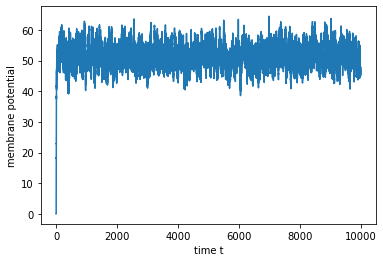

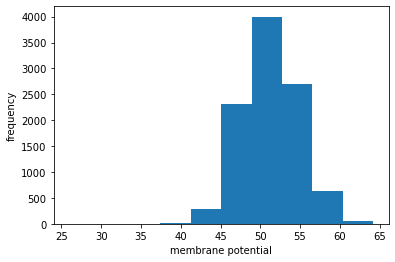

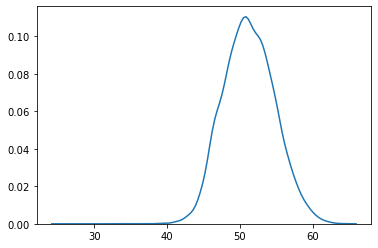

In [4]:
plt.plot(time,u)
plt.xlabel('time t')
plt.ylabel('membrane potential')
plt.show()
b=np.random.choice(u[1000:],size=10000)
plt.hist(b)
plt.xlabel('membrane potential')
plt.ylabel('frequency')
plt.show()
sns.kdeplot(b)

### QN 2: First Part: Expected time for a leaky integrate and fire neuron to fire. Here I use "MaTLAb" ODE solver to find solution of differential equation.

$syms y(x)
syms a b C
Dy = diff(y);

ode = 0.5.*(2.5).*diff(y,x,2) + 5.*diff(y,x,1) == -1;
cond1 = y(C) == 0;
cond2 = y(5) == 0;

conds = [cond1 cond2];
ySol(x) = dsolve(ode,conds);
ySol = simplify(ySol);
sub=subs(ySol,x,0);
expand(limit(sub,C,-Inf))$

Solution is : $y(x)=\frac{(19e^{20-4C}-4C+1)}{20(e^{20-4C}-1)}+ \frac{e^{20}(C-5)}{5e^{20-4C}-1}+\frac{1}{20}$

Here, I got the value of y(x), C is $-\infty$ is 1.


### QN 2: Second Part: Simulation of Integrate and Fire Neuron with threshold:

In [5]:
def QIF(tau_m, u, u_rest):
    return -((u - u_rest)/tau_m)

def poisson_input(rate, dt):
    return np.random.poisson(rate * dt)

def spike_train_QIF(tau_m, u_rest, u_threshold, max_time,I, dt, du): 
    u = []
    time = []
    u.append(u_rest)
    time.append(0)
    current_step = 0
    time_between_spikes = 0
    num_spikes = 0
    while u[current_step]<u_threshold:
        if poisson_input(I, dt) > 0:
            time.append(time[current_step] + dt)
            u.append(u[current_step] + du)
            time.append(time[current_step] + dt)
            if u[current_step] > u_threshold:
                u.append(u_rest)
            num_spikes += 1
        else:
            u.append(u[current_step] + dt * QIF(tau_m, u[current_step], u_rest))
            time.append(time[current_step] + dt)
            time_between_spikes += dt
        current_step += 1
        
    return time

In [32]:
tau_m = 1
u_rest = 0
I = 10
u_threshold=5
max_time = 100
dt = 0.005
du = 0.5
tim = spike_train_QIF(tau_m, u_rest, u_threshold, max_time,I, dt, du)

In [33]:
tim[-1]


0.8600000000000007

## QN 3 Coefficient of Variation for Erlang Distribution with fixed λ and increasing k

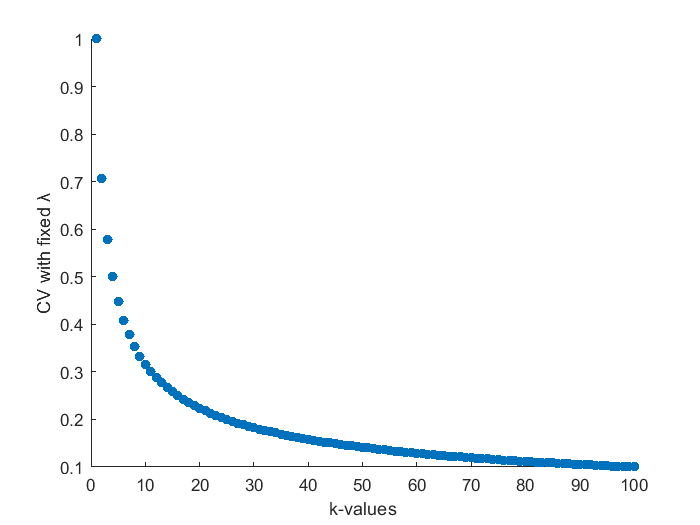

Interpretation: The coefficient of variation decreases with incresing value of k for fixed lambda. Distribution becomes more symmetric with higher values of k.

## QN 5: Estimation of hitting time via simualtions for the two-step adaptations:

In [34]:
# defining transition probabilities:

def tranProb(n1,n2,n3,N,mu):
    prob=np.zeros(7)
    prob[0]=(1-mu)*(n1/N)*(n2/N)
    prob[1]=(1-mu)*(n1/N)*(n3/N)
    prob[2]=(n1/N)*(n3/N)
    prob[3]=(1-mu)*(n2/N)*(n1/N)+mu*(n1/N)*(n1/N)
    prob[4]=(1-mu)*(n2/N)*(n3/N)
    prob[5]=(n3/N)*(n2/N)+mu*(n2/N)*(n2/N)
    prob[6]=1-prob[0]-prob[1]-prob[2]-prob[3]-prob[4]-prob[5]
    return prob


def morann(mu,N):
    n1=[N]
    n2=[0]
    n3=[0]
    i=0
    while n3[i]<1:
        prob=tranProb(n1[i],n2[i],n3[i],N,mu)
        prob_sum=np.cumsum(prob)
        epsi=np.random.uniform(0,1)
        if epsi<prob_sum[0]:
            n1.append(n1[i]+1)
            n2.append(n2[i]-1)
            n3.append(n3[i])
        elif epsi<prob_sum[1]:
            n1.append(n1[i]+1)
            n2.append(n2[i])
            n3.append(n3[i]-1)
        elif epsi<prob_sum[2]:
            n1.append(n1[i]-1)
            n2.append(n2[i])
            n3.append(n3[i]+1)
        elif epsi<prob_sum[3]:
            n1.append(n1[i]+1)
            n2.append(n2[i]-1)
            n3.append(n3[i])
        elif epsi<prob_sum[4]:
            n1.append(n1[i])
            n2.append(n2[i]+1)
            n3.append(n3[i]-1)
        elif epsi<prob_sum[5]:
            n1.append(n1[i])
            n2.append(n2[i]-1)
            n3.append(n3[i]+1)
        else:
            n1.append(n1[i])
            n2.append(n2[i])
            n3.append(n3[i])
        i+=1
    return n1,n2,n3,i

In [ ]:
#time to have first genotype 3 attival
N=1000
mu=0.0001
n1,n2,n3,t=morann(mu,N)
print(t)

In [ ]:
#time to have first genotype 3 attival
N=1000
mu=0.001
n1,n2,n3,t=morann(mu,N)
print(t)

In [ ]:
#time to have first genotype 3 attival
N=1000
mu=0.01
n1,n2,n3,t=morann(mu,N)
print(t)